# [1] EDA Exploratory Data Analysis 탐색적 데이터 분석

In [45]:
# check environment setup

# 파이썬 버전 체크
import sys
print(sys.version) 

3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]


In [2]:
# conda install python=3.7.6  # 특정 버전을 지정해서 콘다로 파이썬 설치할 경우

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.polynomial.polynomial import polyfit
import matplotlib.style as style 
# from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')
# never print matching warnings -- 중요하지 않은 경고 메시지 출력을 무시


# define random jitter
def rjitt(arr):
    stdev = .01*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

# to set data path
dataPath = 'https://raw.githubusercontent.com/stillxyxon/py_ml_analysis/master/'
# to get the data to use from github


# YONG's local data path
# dataPath = 'C:/YONG/m1710/myPydata/'

# Your Own local data path
# dataPath = 'C:/SomeFolder/'

## 탐색적 데이터 분석 기초 (+ 파이썬 기초 Review)

In [55]:
# 연습용 데이터 생성 - 이자율, 실업 등 경제지표와 주가 데이터 예제

from pandas import DataFrame

stockmarket = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
                }

df = DataFrame(stockmarket,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price']) 
df = df.iloc[::-1] # 데이터프레임을 역순으로 변경
df.index = np.array(range(24)) # index 재부여

print(df.shape)
display(df.head())
df.tail()

(24, 5)


,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
0,2016,1,1.75,6.1,719
1,2016,2,1.75,6.2,704
2,2016,3,1.75,6.2,822
3,2016,4,1.75,5.9,876
4,2016,5,1.75,6.1,866


,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
19,2017,8,2.50,5.4,1256
20,2017,9,2.50,5.3,1293
21,2017,10,2.50,5.3,1357
22,2017,11,2.50,5.3,1394
23,2017,12,2.75,5.3,1464


In [5]:
# pandas iloc 문법 복습 -- 조회 -- 일부추출 범위 지정

display(df.iloc[::-1].head())
display(df.head())

,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
23,2017,12,2.75,5.3,1464
22,2017,11,2.50,5.3,1394
21,2017,10,2.50,5.3,1357
20,2017,9,2.50,5.3,1293
19,2017,8,2.50,5.4,1256


,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
0,2016,1,1.75,6.1,719
1,2016,2,1.75,6.2,704
2,2016,3,1.75,6.2,822
3,2016,4,1.75,5.9,876
4,2016,5,1.75,6.1,866


In [65]:
df09 = df.head().copy()
df09.head()

,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
0,2016,1,1.75,6.1,719
1,2016,2,1.75,6.2,704
2,2016,3,1.75,6.2,822
3,2016,4,1.75,5.9,876
4,2016,5,1.75,6.1,866


In [61]:
df09

,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
0,2016,1,1.75,6.1,719
1,2016,2,1.75,6.2,704
2,2016,3,1.75,6.2,822
3,2016,4,1.75,5.9,876
4,2016,5,1.75,6.1,866


In [67]:
df09.index = ['a', 'b','c','d','e']

In [68]:
df09

,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
a,2016,1,1.75,6.1,719
b,2016,2,1.75,6.2,704
c,2016,3,1.75,6.2,822
d,2016,4,1.75,5.9,876
e,2016,5,1.75,6.1,866


In [69]:
df09.reset_index() #새로운 컬럼으로 인덱스를 이동시켜줌. 그러면 인덱스는? 자동부여는 순서대로 숫자로

,index,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
0,a,2016,1,1.75,6.1,719
1,b,2016,2,1.75,6.2,704
2,c,2016,3,1.75,6.2,822
3,d,2016,4,1.75,5.9,876
4,e,2016,5,1.75,6.1,866


In [70]:
df09

,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
a,2016,1,1.75,6.1,719
b,2016,2,1.75,6.2,704
c,2016,3,1.75,6.2,822
d,2016,4,1.75,5.9,876
e,2016,5,1.75,6.1,866


In [71]:
df09.reset_index(inplace=True) 

In [72]:
df09

,index,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
0,a,2016,1,1.75,6.1,719
1,b,2016,2,1.75,6.2,704
2,c,2016,3,1.75,6.2,822
3,d,2016,4,1.75,5.9,876
4,e,2016,5,1.75,6.1,866


In [74]:
df

,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
0,2016,1,1.75,6.1,719
1,2016,2,1.75,6.2,704
2,2016,3,1.75,6.2,822
3,2016,4,1.75,5.9,876
4,2016,5,1.75,6.1,866
5,2016,6,1.75,6.1,884
6,2016,7,1.75,6.1,949
7,2016,8,1.75,6.2,971
8,2016,9,1.75,6.1,958
9,2016,10,1.75,5.8,943


In [79]:
display(df.head())
df09

,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
0,2016,1,1.75,6.1,719
1,2016,2,1.75,6.2,704
2,2016,3,1.75,6.2,822
3,2016,4,1.75,5.9,876
4,2016,5,1.75,6.1,866


,index,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
0,a,2016,1,1.75,6.1,719
1,b,2016,2,1.75,6.2,704
2,c,2016,3,1.75,6.2,822
3,d,2016,4,1.75,5.9,876
4,e,2016,5,1.75,6.1,866


### 기본적인 dataframe 특성 파악

In [81]:
# 행의 수 확인
len(df)

24

In [82]:
# 행과 열의 수 확인
df.shape

(24, 5)

In [84]:
# 행의 수와 열의 수 각각

str(df.shape[0]) + ' rows and ' + str(df.shape[1]) + ' columns'

# + : concatenate strings
# str() : number to string

'24 줄 과 5 columns'

In [89]:
# missing data 존재여부 확인

# df.isna() # 전체 셀 출력
df.isna().tail()

,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
19,False,False,False,False,False
20,False,False,False,False,False
21,False,False,False,False,False
22,False,False,False,False,False
23,False,False,False,False,False


In [93]:
# 컬럼별 missing data 갯수 확인
df.isna().sum()

Year                 0
Month                0
Interest_Rate        0
Unemployment_Rate    0
Stock_Index_Price    0
dtype: int64

In [95]:
# any missing overall?

df.isna().sum().sum()

0

In [97]:
# 응용연습: Unemployment_Rate 컬럼에만 missing data 갯수 확인하려면?

df['Unemployment_Rate'].isna().sum()

# 응용연습: Unemployment_Rate와 Interest_Rate 두 컬럼에 대해서 missing data 갯수 확인하려면?

0

In [106]:
df[['Unemployment_Rate','Interest_Rate']].isna().sum()

Unemployment_Rate    0
Interest_Rate        0
dtype: int64

In [109]:
# 컬럼별 데이터 타입 확인

dataTypeSeries = df.dtypes
print('Data type of each column of Dataframe :')
print(dataTypeSeries)

# int64 또는 floa64 즉 숫자 형식의 컬럼만 추출
df.select_dtypes(include=['int64', 'float64']).head()

Data type of each column of Dataframe :
Year                   int64
Month                  int64
Interest_Rate        float64
Unemployment_Rate    float64
Stock_Index_Price      int64
dtype: object


,Year,Month,Stock_Index_Price
0,2016,1,719
1,2016,2,704
2,2016,3,822
3,2016,4,876
4,2016,5,866


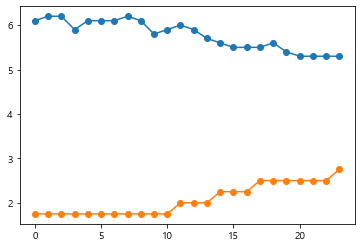

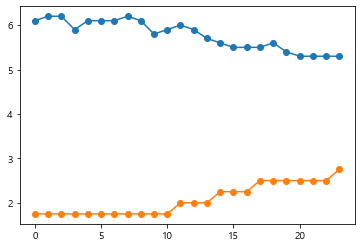

In [124]:
# 컬럼별 시각적 분포 확인

# 수치형 데이터인 경우

plt.plot(df.Unemployment_Rate,'o-')
plt.plot(df.Interest_Rate,'o-')
plt.show()

plt.plot(df.Unemployment_Rate,'o-')
plt.plot(df.Interest_Rate,'o-')
plt.show()



<AxesSubplot:>

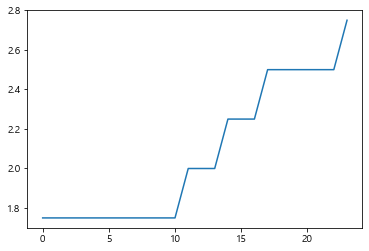

In [127]:
# pandas 함수를 바로 사용하는 경우

df.Interest_Rate.plot()

<AxesSubplot:>

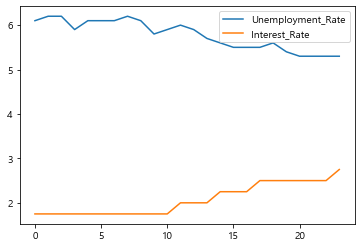

In [121]:
df[['Unemployment_Rate','Interest_Rate']].plot()

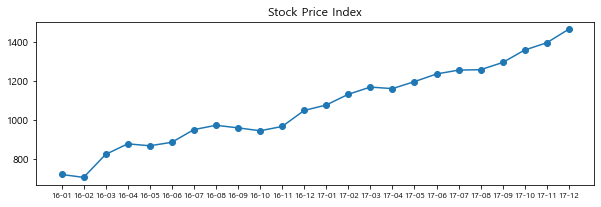

In [130]:
# 플롯의 X축에 연월 year-month 표시

df['date'] = df['Year'].map(str)+'-'+df['Month'].map(str)
df['date'] = pd.to_datetime(df['date'], format='%Y-%m').dt.strftime('%y-%m')

fig, ax = plt.subplots(figsize=(10,3))
plt.plot(df['date'], df.Stock_Index_Price, 'o-')

# X축 틱만 폰트를 줄이기 위한 (글자가 겹쳐 보이는 문제 해결)
ax.tick_params(axis='x', which='major', labelsize=8)
plt.title('Stock Price Index')
plt.show()

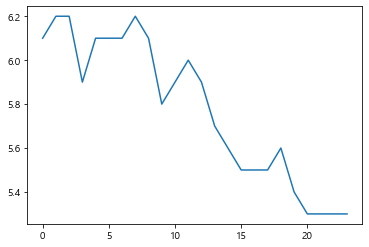

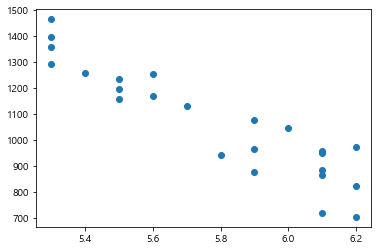

In [135]:
plt.plot(df.Unemployment_Rate)
plt.show()
plt.scatter(df.Unemployment_Rate, df.Stock_Index_Price)

Text(5.8, 1400, 'red: recent months')

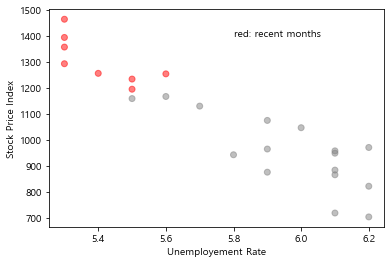

In [144]:
# Scatter Plot 스캐터 플롯 산점도
# 두 변수간 관계를 시각적으로 검토

colors1 = ['red' if x>=16 else 'grey' for x in df.index]
#print(colors1)
plt.scatter(df.Unemployment_Rate, df.Stock_Index_Price,
           color= colors1,
           alpha=0.5)
plt.xlabel('Unemployement Rate')
plt.ylabel('Stock Price Index')
plt.text(5.8,1400,'red: recent months')

- [연습문제] 실업률과 이자율간의 관계를 본다면?


Text(5.8, 2.5, 'red: recent months')

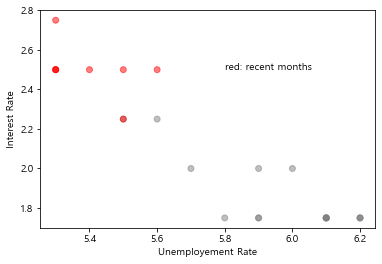

In [152]:
# 연습문제 풀이

colors1 = ['red' if x>=16 else 'grey' for x in df.index]
#print(colors1)
plt.scatter(df.Unemployment_Rate, df.Interest_Rate, # 관심 항목으로 데이터 변경
           color= colors1,
           alpha=0.5)
plt.xlabel('Unemployement Rate')
plt.ylabel('Interest Rate') # 라벨명 변경
plt.text(5.8, 2.5,'red: recent months') # 좌표 스케일 고려한 변경

- 여전한 고민거리 ..... 같은 좌표에 여러 점이 존재하고 겹쳐보여서 대책 필요

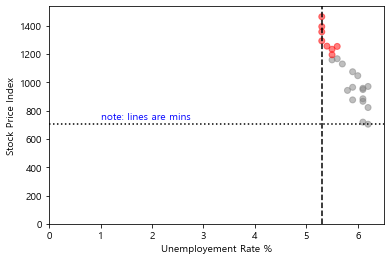

In [156]:
# xlim ylim 조절 - 0을 기준점으로 삼아 변화를 지나치게 크게 인식하는 문제 해소

plt.scatter(df.Unemployment_Rate, df.Stock_Index_Price,
           color=colors1,
           alpha=0.5)
plt.xlabel('Unemployement Rate %')
plt.ylabel('Stock Price Index')
plt.xlim(0,df.Unemployment_Rate.max()*1.05) # 최대보다 5% 큰 값 까지로 챠트 영역 설정
plt.ylim(0,df.Stock_Index_Price.max()*1.05)
# 보조선 추가 - 최소값
plt.axvline(df.Unemployment_Rate.min(), color='k', linestyle='--')
plt.axhline(df.Stock_Index_Price.min(), color='k', linestyle='dotted')
plt.text(1, df.Stock_Index_Price.min()*1.05, 
        'note: lines are mins', color='blue')
plt.show()

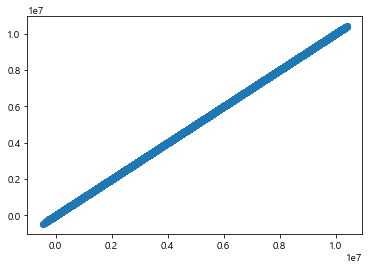

In [169]:
t1 = rjitt(np.array(range(10000000))) #많은 데이터를 전부 사용해서 시각적인 분석을 해야할까?
plt.scatter(t1, t1)

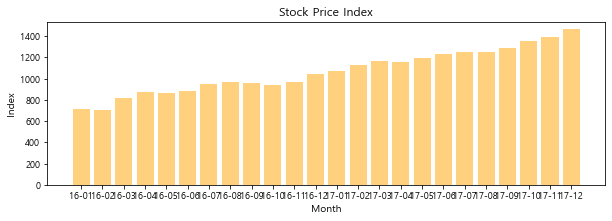

In [182]:
# bar plot 막대그래프

fig, ax = plt.subplots(figsize=(10,3))
plt.bar(df['date'], df.Stock_Index_Price, alpha=0.5, color='orange') # 막대를 주황색으로?

# X축 틱만 폰트를 줄이기 위한 (글자가 겹쳐 보이는 문제 해결)
ax.tick_params(axis='x', which='major', labelsize=8) # x, y 축 모두 폰트를 바꾸려면??
ax.tick_params(axis='y', which='major', labelsize=8) 
ax.tick_params(which='major', labelsize=9)  # 디폴트는 두 축 모두임~~!!
plt.title('Stock Price Index')
plt.xlabel('Month') ; plt.ylabel('Index') # 세미콜론 ';' 의미는?
plt.show()

In [185]:
df.columns

Index(['Year', 'Month', 'Interest_Rate', 'Unemployment_Rate',
       'Stock_Index_Price', 'date'],
      dtype='object')

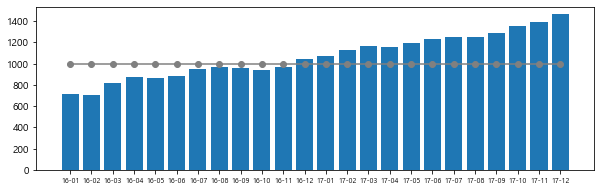

In [188]:
fig, ax = plt.subplots(figsize=(10,3))
plt.bar(df.date, df.Stock_Index_Price)

# 플롯을 추가 (overlay)
plt.plot(range(24),np.repeat(1000,24), 'o-', color='grey')
ax.tick_params(axis='x', which='major', labelsize=7)
# plt.axhline(1000, color='green')
plt.show()

In [161]:
print(np.array(range(24)))
print(np.repeat(1000,24))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000
 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]


(array([ 8.,  4., 12.]),
 array([5.3, 5.6, 5.9, 6.2]),
 <BarContainer object of 3 artists>)

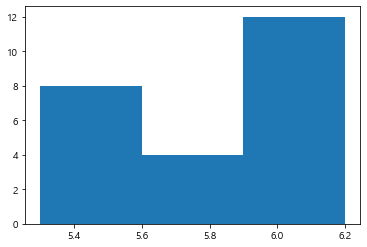

In [191]:
# histogram

plt.hist(df.Unemployment_Rate, bins=3)

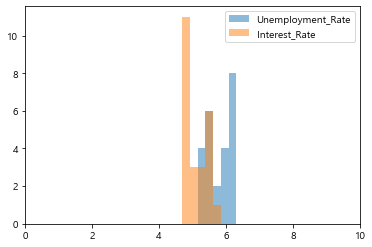

In [196]:
# 복수의 히스토그램을 하나의 챠트에 표현

bins = np.linspace(4, 7, 14)
# 지정한 구간 내에서 지정한 갯수로 구간을 구분

plt.hist(df.Unemployment_Rate, bins=bins, alpha=0.5, label="Unemployment_Rate")
plt.xlim(0,10)
# 겹치는 예를 보기 위해 임시로 이동
plt.hist(df.Interest_Rate+3, bins=bins, alpha=0.5, label="Interest_Rate")
# 겹쳐도 보여지도록 투명도를 조절
plt.legend(loc='upper right')
plt.show()

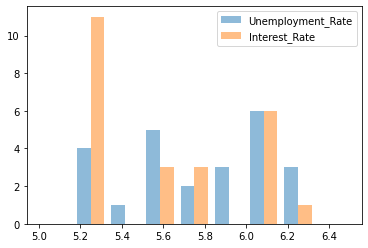

In [23]:
# side-by-side histogram
# 겹쳐서 구별이 안되는 경우에 대한 처리

bins = np.linspace(5, 6.5, 10)
# 지정한 구간 내에서 지정한 갯수로 구간을 구분

plt.hist([df.Unemployment_Rate, df.Interest_Rate+3.5], bins=bins, alpha=0.5)
# 구간이 겹치는 예제로 바꾸기 위해 이자율의 분포를 이동시킨 것
plt.legend(['Unemployment_Rate', 'Interest_Rate'], loc='upper right')
plt.show()

In [197]:
# matplotlib 에서 한글을 표시하기 위한 설정
import matplotlib

font_name = matplotlib.font_manager.FontProperties(
                fname="c:/Windows/Fonts/malgun.ttf"  # 윈도우즈의 한글 폰트 위치를 지정
            ).get_name()
matplotlib.rc('font', family=font_name) # 한글 표시 가능하도록 폰트 지정 
matplotlib.rcParams['axes.unicode_minus'] = False #  음수를 나타내는 '-' 부호가 정상 표시되도록

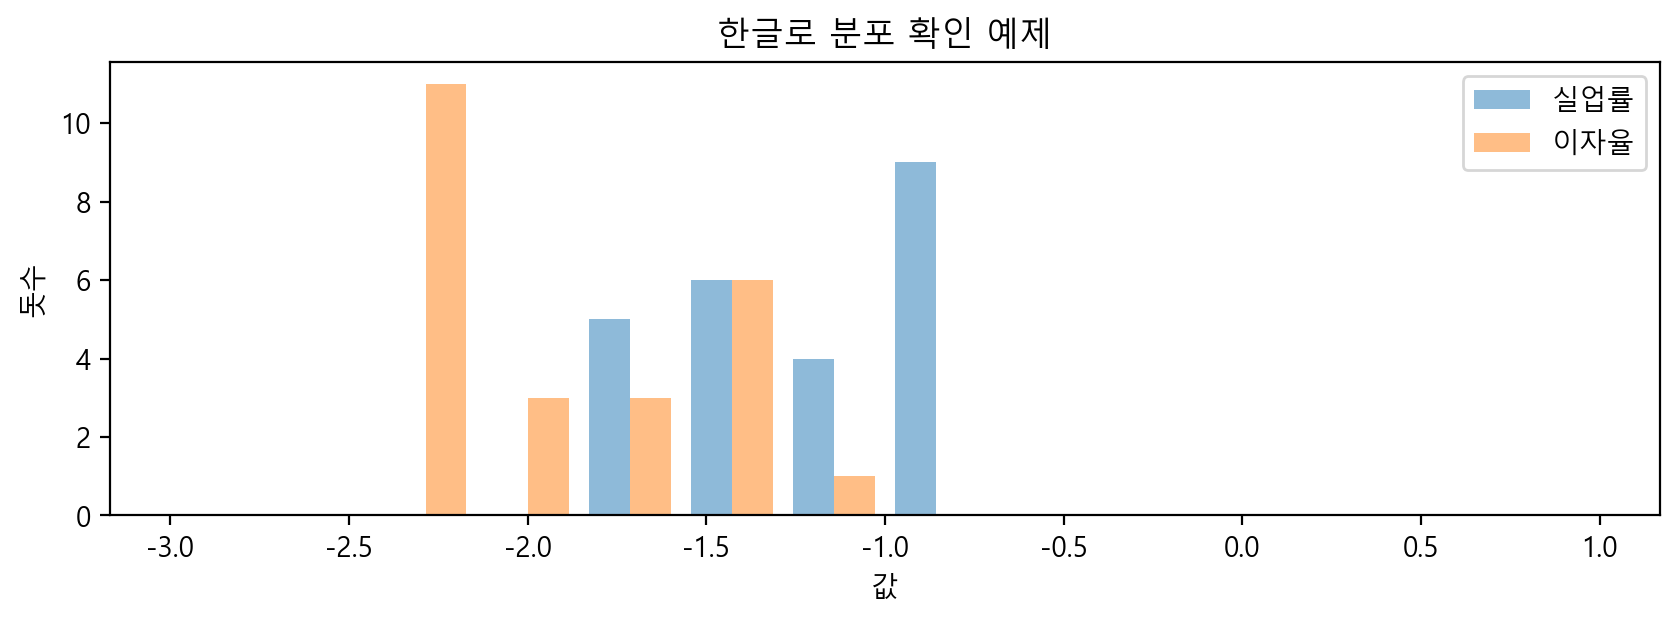

In [199]:
# matplotlib에서 한글 라벨 표시 적용 예제

bins = np.linspace(-3, 1, 15)

plt.figure(dpi=200, figsize=(10,3))
# dpi 옵션은 해상도 조절 -- 선명하게

plt.hist([df.Unemployment_Rate-7, df.Interest_Rate-4], bins=bins, alpha=0.5)
plt.legend(['실업률', '이자율'], loc='upper right')
plt.ylabel('돗수')
plt.xlabel('값')
plt.title('한글로 분포 확인 예제')
plt.show()

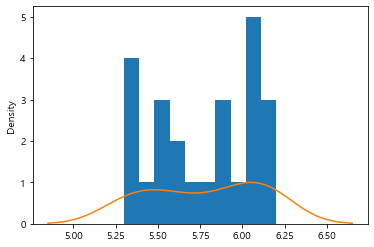

In [204]:
# density plot using pandas

df.Unemployment_Rate.hist()
df.Unemployment_Rate.plot.density() # 밀도 챠트
plt.show()

<AxesSubplot:xlabel='Unemployment_Rate', ylabel='Density'>

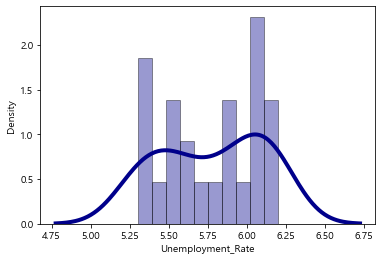

In [208]:
# Density Plot and Histogram using seaborn (SNS)

import seaborn as sns

sns.distplot(df.Unemployment_Rate, hist=True, kde=True, 
             bins=10, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

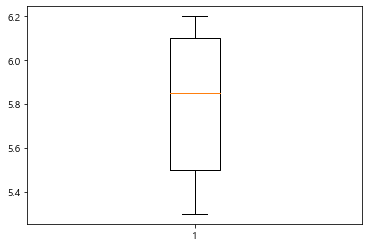

In [28]:
# boxplot

plt.boxplot(df.Unemployment_Rate)
plt.show()

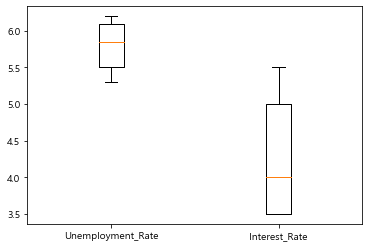

In [212]:
plt.boxplot([df.Unemployment_Rate, df.Interest_Rate*2])

# 1번은 실업률, 2번은 이자율로 x축 값 변경
plt.xticks([1,2], ['Unemployment_Rate', 'Interest_Rate'])
plt.show()

In [30]:
# 중위수와 4분위수 산출

# 중위수 
print('median : ', df.Unemployment_Rate.median())

# 최대값
print('\nmax : ', df.Unemployment_Rate.max())
# [\n] 은 줄바꿈

# 평균
print('mean : ', df.Unemployment_Rate.mean())
print(' ')

# 하위 25% 지점
print(df.Unemployment_Rate.quantile(q=[0.25,0.75]))


median :  5.85

max :  6.2
mean :  5.775000000000001
 
0.25    5.5
0.75    6.1
Name: Unemployment_Rate, dtype: float64


[Jump] mtcars 연습을 먼저 한 후 이어서 아래 부분으로

In [31]:
# categorical data for EDA

# National League Western League - MLB

nlwteam = pd.DataFrame({'team': ['Dodgers', 'Padres', 'Giants', 'Rockies', 'Diamondbacks'],
            'location': ['LA', 'San Diego', 'San Francisco' , 'Colorado',  'Arizona'],
            'hr': [118, 95, 81, 63, 58],
            'obp': [.338, .333, .335, .311, .312],
            'slg': [.483, .466, .451, .405, .391],
            'lastWSwin': [ 2020, np.nan, 2014, 2007, 2001]})

nlwteam 

,team,location,hr,obp,slg,lastWSwin
0,Dodgers,LA,118,0.338,0.483,2020.0
1,Padres,San Diego,95,0.333,0.466,NaN
2,Giants,San Francisco,81,0.335,0.451,2014.0
3,Rockies,Colorado,63,0.311,0.405,2007.0
4,Diamondbacks,Arizona,58,0.312,0.391,2001.0


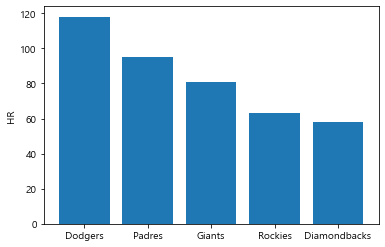

In [213]:
plt.bar(nlwteam.team, nlwteam.hr)
plt.ylabel('HR')
plt.show()

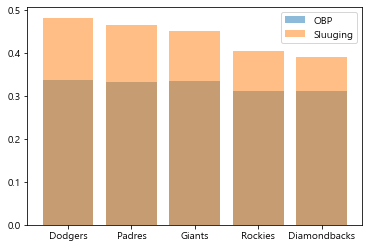

In [33]:
plt.bar(nlwteam.team, nlwteam.obp, alpha=0.5)
plt.bar(nlwteam.team, nlwteam.slg, alpha=0.5)
plt.legend(['OBP','Sluuging'])

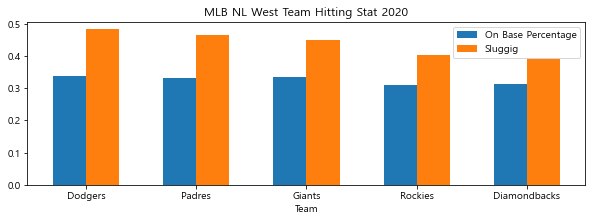

In [214]:
# Side-by-Side Bar Chart

# Numbers of pairs of bars you want
N = len(nlwteam)

# Data on X-axis

# Specify the values of blue bars (height)
blue_bar = nlwteam.obp
# Specify the values of orange bars (height)
orange_bar = nlwteam.slg

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,3))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, blue_bar , width, label='On Base Percentage')
plt.bar(ind + width, orange_bar, width, label='Sluggig')

plt.xlabel('Team')
plt.title('MLB NL West Team Hitting Stat 2020')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, nlwteam.team)

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

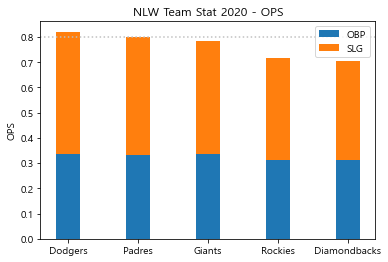

In [215]:
# Stacked Bard Chart

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(nlwteam.team, nlwteam.obp, width, label='OBP')
ax.bar(nlwteam.team, nlwteam.slg, width, bottom=nlwteam.obp,
       label='SLG')

ax.set_ylabel('OPS')
ax.set_title('NLW Team Stat 2020 - OPS')
ax.legend()
plt.axhline(0.8, linestyle='dotted', color='silver')
plt.show()

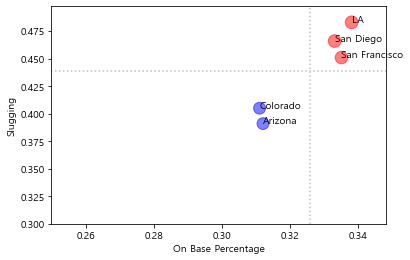

In [220]:
# Use Scatter Plot

ops = nlwteam.obp + nlwteam.slg
colors1 = ['red' if x>ops.mean() else 'blue' for x in ops]

plt.scatter(nlwteam.obp, nlwteam.slg, 
            s=ops *200,
           alpha=0.5,
           color=colors1)
plt.xlim(0.25,nlwteam.obp.max()*1.03)
plt.ylim(0.3,nlwteam.slg.max()*1.03)
plt.axvline(nlwteam.obp.mean(), linestyle='dotted', color='silver')
plt.axhline(nlwteam.slg.mean(), linestyle='dotted', color='silver')
plt.xlabel('On Base Percentage')
plt.ylabel('Slugging')

# Point Label 표시
for i in range(len(nlwteam)):
    plt.text(nlwteam.obp[i], nlwteam.slg[i], nlwteam.location[i])
plt.show()

In [37]:
# 변수간 상관관계 확인

nlwteam[['obp','hr','slg']].corr()

,obp,hr,slg
obp,1.000000,0.880083,0.961764
hr,0.880083,1.000000,0.959458
slg,0.961764,0.959458,1.000000


In [224]:
# 홈런과 OPS(=OBP+SLG) 간 상관관계 확인

print('nlwteam.hr, ops 상관관계', round(np.corrcoef(nlwteam.hr, ops)[0,1],4))
print('ops, 순위 상관관계', round(np.corrcoef(ops, -nlwteam.index)[0,1],4))
print('홈런, 순위 상관관계', round(np.corrcoef(nlwteam.hr, -nlwteam.index)[0,1],4))

nlwteam.hr, ops 상관관계 0.9464
ops, 순위 상관관계 0.9628
홈런, 순위 상관관계 0.9816


In [223]:
np.corrcoef(nlwteam.hr, ops)[0,1]

0.946438667578973

[0. 0. 0. 0.]
hr  :  0.9816
obp  :  0.8878
slg  :  0.9785
ops  :  0.9628


(['hr', 'obp', 'slg', 'ops'], array([0.9816, 0.8878, 0.9785, 0.9628]))

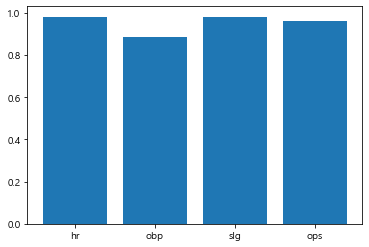

In [229]:
# 어떤 지표가 순위와 가장 상관관계가 큰가?

nlwteam['ops'] = ops

# 결과를 저장할 배열을 미리 생성
corrvals = np.repeat(0.00, 4)
print(corrvals)

# 지표 리스트 생성
indicators = ['hr','obp','slg', 'ops']

# list and index 동시에 필요
for i in range(len(indicators)):
    corrvals[i] = round(np.corrcoef(-nlwteam.index, nlwteam[indicators[i]])[0,1],4)
    print(indicators[i], ' : ', corrvals[i])

plt.bar(indicators,corrvals);
indicators, corrvals

In [40]:
# 상관관계 개념 복습

print(np.corrcoef(-nlwteam.index, nlwteam.hr)[0,1])
print(np.corrcoef(-nlwteam.index+1, nlwteam.hr)[0,1])
print(np.corrcoef(-nlwteam.index*9, nlwteam.hr-500)[0,1])

# 상관계수 값은 Scale에 영향받지 않음

0.981564851634863
0.981564851634863
0.9815648516348631


In [230]:
# scaling 범위, 척도

# min-max scaling ; zero-max scaling

df.head()

,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price,date
0,2016,1,1.75,6.1,719,16-01
1,2016,2,1.75,6.2,704,16-02
2,2016,3,1.75,6.2,822,16-03
3,2016,4,1.75,5.9,876,16-04
4,2016,5,1.75,6.1,866,16-05


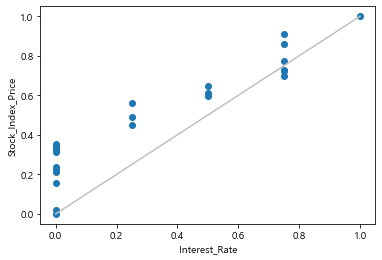

In [231]:
# custom min max scaler

# 0~1 사이로 변환
def mnmx_scl(vec):
    vec = (vec-vec.min())/(vec.max()-vec.min())
    return(vec)

# 최대값이 1이되도록 변환
def zrmx_scl(vec):
    vec = vec/vec.max()
    return(vec)


plt.scatter(mnmx_scl(df.Interest_Rate), mnmx_scl(df.Stock_Index_Price))
plt.xlabel('Interest_Rate')
plt.ylabel('Stock_Index_Price')

# 대각선 보조선 용도로 추가
plt.plot([0, 1], [0, 1],  color='silver')
plt.show()

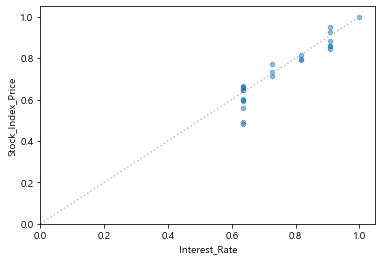

In [233]:
plt.scatter(zrmx_scl(df.Interest_Rate), zrmx_scl(df.Stock_Index_Price),
           alpha=0.5, s=20)
plt.xlabel('Interest_Rate')
plt.ylabel('Stock_Index_Price')
plt.xlim(0,1.05)
plt.ylim(0,1.05)
plt.plot([0, 1], [0, 1], color='silver', linestyle='dotted')
plt.show()